In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
from bayes_opt import BayesianOptimization
from skopt import BayesSearchCV
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 60)


In [ ]:
df=pd.read_csv("train_v2.csv")

In [ ]:
df.head()

,id,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,...,f750,f751,f752,f753,f754,f755,f756,f757,f758,f759,f760,f761,f762,f763,f764,f765,f766,f767,f768,f769,f770,f771,f772,f773,f774,f775,f776,f777,f778,loss
0,1,126,10,0.686842,1100,3,13699,7201.0,4949.0,126.75,126.03,7,0.7607,0.7542,612922,0.7236,0.7236,0.5171,0.7236,0.8476,0.7876,1.097851e+09,89,66,998046.0,89.0,89.0,89.00,89.00,89.0,...,2.3451,0.030594,1.7418,1.5271,0.8474,0.4715,0.028362,3.1611,2.5162,2.0037,0.019636,4.4352,4.2676,-0.1524,1,-0.40,-0.560,-0.440,-0.6280,-3.14,5,2.14,-1.54,1.18,0.1833,0.7873,1,0,5,0
1,2,121,10,0.782776,1100,3,84645,240.0,1625.0,123.52,121.35,7,0.6555,0.6555,245815,0.6341,0.6341,0.3909,0.6667,0.6903,0.6903,8.449459e+08,78,50,754416.0,78.0,78.0,78.00,78.00,78.0,...,1.5666,0.120442,1.1963,1.0322,0.4843,0.2389,0.130160,2.7659,1.9523,1.4059,0.115277,3.2763,2.7962,-0.3097,1,-0.17,-0.275,-0.203,-0.2300,-1.38,6,0.54,-0.24,0.13,0.1926,-0.6787,1,0,5,0
2,3,126,10,0.500080,1100,3,83607,1800.0,1527.0,127.76,126.49,7,0.7542,0.7542,1385872,0.7542,0.7542,0.5508,0.7542,0.8091,0.7807,1.308478e+09,89,54,1037651.0,89.0,89.0,100.43,94.37,89.0,...,4.5627,0.226336,3.3277,3.4166,1.8321,0.9979,0.103307,6.8623,5.2963,4.1282,0.219729,8.1381,7.3269,-0.1909,1,-0.58,-0.540,-0.572,-0.3985,-5.18,13,2.89,-1.73,1.04,0.2521,0.7258,1,0,5,0
3,4,134,10,0.439874,1100,3,82642,7542.0,1730.0,132.94,133.58,7,0.8017,0.7881,704687,0.7881,0.7881,0.5923,0.7881,0.8230,0.8158,1.472752e+09,93,55,1115721.0,93.0,93.0,114.63,102.92,93.0,...,1.6899,0.054630,1.3748,1.3421,0.7982,0.4810,0.081205,2.5571,2.0593,1.6653,0.056470,3.2516,3.0631,-0.1770,1,-0.75,-0.635,-0.745,-0.5100,-2.04,4,1.29,-0.89,0.66,0.2498,0.7119,1,0,5,0
4,5,109,9,0.502749,2900,4,79124,89.0,491.0,122.72,112.77,6,0.5263,0.5263,51985,0.5263,0.5263,0.3044,0.5405,0.5556,0.5455,1.442916e+09,60,21,536400.0,60.0,60.0,60.00,60.00,60.0,...,11.9179,0.085330,7.2175,6.2262,3.1446,1.6149,0.074286,15.9080,12.5688,9.9844,0.067540,17.5561,15.6079,-0.4444,1,-0.18,-0.280,-0.182,-0.4277,-11.12,26,6.11,-3.82,2.51,0.2282,-0.5399,0,0,5,0


In [ ]:
df.shape

(105471, 771)

In [ ]:
df.isnull().sum()

id       0
f1       0
f2       0
f3       0
f4       0
        ..
f775    19
f776     0
f777     0
f778     0
loss     0
Length: 771, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Columns: 771 entries, id to loss
dtypes: float64(653), int64(99), object(19)
memory usage: 11.8+ MB


In [ ]:
df.fillna(df.mean(), inplace=True)


In [ ]:
for i in df.select_dtypes(include=['object']).columns:
    df.drop(labels=i, axis=1, inplace=True)


Text(0.5, 1.0, 'Loss Distribution')

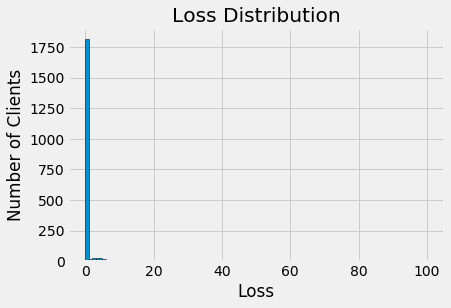

In [ ]:
figsize=(8, 8)

plt.style.use('fivethirtyeight')
plt.hist(df['loss'], bins = 100, edgecolor = 'k')
plt.xlabel('Loss') 
plt.ylabel('Number of Clients');
plt.title('Loss Distribution')


In [ ]:
ITERATIONS = 2
TRAINING_SIZE = 100000 
TEST_SIZE = 25000


In [ ]:
y = df['loss']
X = df.drop(['loss'], axis=1)


In [ ]:
bayes_cv_tuner = BayesSearchCV(
    estimator = xgb.XGBClassifier(
        n_jobs = 1,
        objective = 'binary',
        eval_metric = 'auc',
        silent=1,
        tree_method='approx'
    ),
    search_spaces = {
        'learning_rate': (0.1, 1.0),
        'min_child_weight': (0, 10),
        'max_depth': (0, 50),
        'max_delta_step': (0, 20),
        'subsample': (0.01, 1.0),
        'colsample_bytree': (0.01, 1.0),
        'colsample_bylevel': (0.01, 1.0),
        'reg_lambda': (1e-9, 1000, ),
        'reg_alpha': (1e-9, 1.0),
        'gamma': (1e-9, 0.5),
        'min_child_weight': (0, 5),
        'n_estimators': (50, 100),
        'scale_pos_weight': (1e-6, 500)
    },    
    cv = StratifiedKFold(
        n_splits=3,
        shuffle=True,
        random_state=42
    ),
    n_jobs = 3,
    n_iter = ITERATIONS,   
    verbose = 0,
    refit = True,
    random_state = 42
)

def status_print(optim_result):
    
    all_models = pd.DataFrame(bayes_cv_tuner.cv_results_)    
    
    best_params = pd.Series(bayes_cv_tuner.best_params_)
    print('ITERATIONS #{}\nBest ROC-AUC: {}\nBest params: {}\n'.format(
        len(all_models),
        np.round(bayes_cv_tuner.best_score_, 4),
        bayes_cv_tuner.best_params_
    ))
    
    clf_name = bayes_cv_tuner.estimator.__class__.__name__
    all_models.to_csv(clf_name+"_cv_results.csv")


In [ ]:
result = bayes_cv_tuner.fit(X.values, y.values, callback=status_print)


Model #1
Best ROC-AUC: 0.9075
Best params: OrderedDict([('colsample_bylevel', 0.4160029192647807), ('colsample_bytree', 0.7304484857455519), ('gamma', 0.46643399949104897), ('learning_rate', 0.3842196341383438), ('max_delta_step', 13), ('max_depth', 21), ('min_child_weight', 2), ('n_estimators', 87), ('reg_alpha', 0.30446331173204294), ('reg_lambda', 647.7915883472299), ('scale_pos_weight', 274.98197135492813), ('subsample', 0.13556548021189216)])

Model #2
Best ROC-AUC: 0.9075
Best params: OrderedDict([('colsample_bylevel', 0.4160029192647807), ('colsample_bytree', 0.7304484857455519), ('gamma', 0.46643399949104897), ('learning_rate', 0.3842196341383438), ('max_delta_step', 13), ('max_depth', 21), ('min_child_weight', 2), ('n_estimators', 87), ('reg_alpha', 0.30446331173204294), ('reg_lambda', 647.7915883472299), ('scale_pos_weight', 274.98197135492813), ('subsample', 0.13556548021189216)])

[09:11:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.c